In [119]:
import pandas as pd
import os

In [120]:
cur_dir = os.getcwd()
data_list = os.listdir(cur_dir+'./data')
Dataset = dict()

for data_name in data_list[:]:
    
    for encoding in ['cp949', 'utf-8']:
        try:
            Dataset[data_name[0:-4]] = pd.read_csv(cur_dir + f'/data/{data_name}', encoding=encoding)
            print(f"Successfully read {data_name} with encoding: {encoding}")
            break  # 읽기에 성공한 경우 반복문 종료
        except UnicodeDecodeError:
            print(f"Failed to read {data_name} with encoding: {encoding}")

Successfully read 2017~2022 사설학원수.csv with encoding: cp949
Successfully read 2017~2022 초등학교 학생 수.csv with encoding: cp949
Successfully read 4.2.15_시·군·구별_근로소득_연말정산_신고현황_주소지_2016_20230810140813.csv with encoding: cp949
Successfully read heabeop_좌표변환_최종.csv with encoding: cp949
Failed to read purunet - purunet (1).csv with encoding: cp949
Successfully read purunet - purunet (1).csv with encoding: utf-8
Successfully read 학교급_및_시도별__학생_1인당_월평균_사교육비_20230811081450.csv with encoding: cp949


### 필요한 데이터 가져오기

In [121]:
df_edu = pd.read_csv("./pre_data/2017~2022 사설학원수.csv")
df_stu = pd.read_csv("./pre_data/2017~2022 초등학교 학생 수.csv")
df = pd.read_csv("./pre_data/급여 2022 예측값.csv")


### 데이터 합치기

In [122]:
new_df = pd.merge(df_stu,df_edu,left_on =['지역','행정구역별'], right_on=['지역', '행정구역별'] )
new_df_3 = pd.merge(new_df,df,left_on =['지역','행정구역별'], right_on=['행정구역(시군구)별(1)', '행정구역(시군구)별(2)'], how = 'outer' )

In [123]:
new_df_3=new_df_3.drop(['행정구역(시군구)별(1)','행정구역(시군구)별(2)'], axis=1)
new_df_3.head(2)

,지역,행정구역별,2017_x,2018_x,2019_x,2020_x,2021_x,2022_x,2017_y,2018_y,2019_y,2020_y,2021_y,2022_y,2017년 평균급여(백만원),2018년 평균급여(백만원),2019년 평균급여(백만원),2020년 평균급여(백만원),2021년 평균급여(백만원),2022년 평균급여_예측값(백만원)
0,서울특별시,종로구,60257,58800,57498,56258,55087,53537,297,274,259,243,217,248,46.591874,47.627325,48.704777,49.051739,52.233029,55.396114
1,서울특별시,중구,39008,38546,37968,37344,36209,34946,128,119,118,109,91,108,43.236590,44.886460,46.202919,47.315930,49.499323,51.574272


In [124]:
# 결측치가 많은 데이터 제거(인천광역시)
new_df_3 = new_df_3[new_df_3.isnull().sum(axis=1) < 10]

### 데이터들을 보기 편하게 재정열

In [125]:
new_order = ['지역', '행정구역별', '2017_x','2017_y','2017년 평균급여(백만원)',
             '2018_x','2018_y','2018년 평균급여(백만원)','2019_x','2019_y','2019년 평균급여(백만원)',
             '2020_x','2020_y','2020년 평균급여(백만원)',
             '2021_x','2021_y','2021년 평균급여(백만원)','2022_x','2022_y','2022년 평균급여_예측값(백만원)']

In [126]:
new_df_3= new_df_3[new_order]

In [127]:
new_df_3.head(3)

,지역,행정구역별,2017_x,2017_y,2017년 평균급여(백만원),2018_x,2018_y,2018년 평균급여(백만원),2019_x,2019_y,2019년 평균급여(백만원),2020_x,2020_y,2020년 평균급여(백만원),2021_x,2021_y,2021년 평균급여(백만원),2022_x,2022_y,2022년 평균급여_예측값(백만원)
0,서울특별시,종로구,60257,297,46.591874,58800,274,47.627325,57498,259,48.704777,56258,243,49.051739,55087,217,52.233029,53537,248,55.396114
1,서울특별시,중구,39008,128,43.236590,38546,119,44.886460,37968,118,46.202919,37344,109,47.315930,36209,91,49.499323,34946,108,51.574272
2,서울특별시,용산구,32769,175,57.264589,31589,158,58.846350,30400,155,62.704326,29290,154,64.923778,28532,137,69.795335,27552,151,75.401150


### 2022년 데이터만 따로 빼와 분석

In [128]:
df_2022 = new_df_3[['지역','행정구역별','2022_x','2022_y','2022년 평균급여_예측값(백만원)']]

In [129]:
df_2022

,지역,행정구역별,2022_x,2022_y,2022년 평균급여_예측값(백만원)
0,서울특별시,종로구,53537,248,55.396114
1,서울특별시,중구,34946,108,51.574272
2,서울특별시,용산구,27552,151,75.401150
3,서울특별시,성동구,50768,294,58.089157
4,서울특별시,광진구,69065,441,43.268932
...,...,...,...,...,...
224,경상남도,함양군,3124,40,34.537537
225,경상남도,거창군,9189,86,34.763977
226,경상남도,합천군,2504,30,33.631878
227,제주특별자치도,제주시,91703,930,35.934963


In [130]:
df_2022.columns= ['지역','행정구역별','초등학교 학생수','사설학원수(개)','평균 급여(백만원)']

In [131]:
# 문자형으로 잘못 표현된 데이터에 대해 숫자형으로 변환

df_2022['초등학교 학생수'] = pd.to_numeric(df_2022['초등학교 학생수'], errors='coerce')
df_2022['사설학원수(개)'] = pd.to_numeric(df_2022['사설학원수(개)'], errors='coerce')
df_2022['평균 급여(백만원)'] = pd.to_numeric(df_2022['평균 급여(백만원)'], errors='coerce')


C:\Users\user\AppData\Local\Temp\ipykernel_20788\3942111640.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_20788\3942111640.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_20788\3942111640.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

## 가중치 설정을 위해 중요도 분석


### 사교육비를 타켓으로 삼기위해 시도별 사교육비 평균보다 높은것을 1 낮은것을 1로 설정

In [132]:
df_expen = Dataset['학교급_및_시도별__학생_1인당_월평균_사교육비_20230811081450']


In [133]:
df_expen=df_expen.drop([0,1])
df_expen=df_expen.drop(['2022'],axis=1)
df_expen['2022.1'] = pd.to_numeric(df_expen['2022.1'], errors='coerce')

In [134]:
average = df_expen['2022.1'].mean()
df_expen['2022.1'] = df_expen['2022.1'].apply(lambda x: 1 if x > average else 0)

In [135]:
# 이전 데이터들과 자치구 이름을 맞춰주기위한 코드
def change_region_name(region):
    region_mapping = {
        '서울': '서울특별시',
        '부산': '부산광역시',
        '대구': '대구광역시',
        '인천': '인천광역시',
        '광주': '광주광역시',
        '대전': '대전광역시',
        '울산': '울산광역시',
        '세종': '세종특별자치시',
        '경기': '경기도',
        '강원': '강원특별자치도',
        '충북': '충청북도',
        '충남': '충청남도',
        '전북': '전라북도',
        '전남': '전라남도',
        '경북': '경상북도',
        '경남': '경상남도',
        '제주': '제주특별자치도'
    }
    
    if region in region_mapping:
        return region_mapping[region]
    return region

In [136]:
df_expen['시도별'] = df_expen['시도별'].apply(lambda x: x.replace(' ',''))
df_expen['시도별'] = df_expen['시도별'].apply(change_region_name)

In [137]:
df_expen

,시도별,2022.1
2,서울특별시,1
3,부산광역시,1
4,대구광역시,1
5,인천광역시,1
6,광주광역시,0
7,대전광역시,1
8,울산광역시,1
9,세종특별자치시,1
10,경기도,1
11,강원특별자치도,0


### 2022 데이터에 타켓데이터를 추가 

In [138]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, classification_report


In [139]:
df_2022['Target'] = df_2022['지역'].map(df_expen.set_index('시도별')['2022.1']).fillna(0)

C:\Users\user\AppData\Local\Temp\ipykernel_20788\3476654974.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [140]:
df_2022

,지역,행정구역별,초등학교 학생수,사설학원수(개),평균 급여(백만원),Target
0,서울특별시,종로구,53537.0,248.0,55.396114,1
1,서울특별시,중구,34946.0,108.0,51.574272,1
2,서울특별시,용산구,27552.0,151.0,75.401150,1
3,서울특별시,성동구,50768.0,294.0,58.089157,1
4,서울특별시,광진구,69065.0,441.0,43.268932,1
...,...,...,...,...,...,...
224,경상남도,함양군,3124.0,40.0,34.537537,0
225,경상남도,거창군,9189.0,86.0,34.763977,0
226,경상남도,합천군,2504.0,30.0,33.631878,0
227,제주특별자치도,제주시,91703.0,930.0,35.934963,0


In [141]:
df_2022[df_2022['지역']=='울산광역시']

,지역,행정구역별,초등학교 학생수,사설학원수(개),평균 급여(백만원),Target
70,울산광역시,중구,23734.0,443.0,45.589096,1
71,울산광역시,남구,54029.0,1012.0,48.743920,1
72,울산광역시,동구,29415.0,274.0,41.818825,1
73,울산광역시,북구,34119.0,454.0,47.906338,1
74,울산광역시,울주군,32584.0,401.0,43.030190,1


In [142]:
null_cnt_df = pd.DataFrame(df_2022.isnull().sum()).rename(columns = {0:'null_count'}).reset_index()
null_cnt_df['null_ratio'] = round(null_cnt_df['null_count']/len(df_2022) * 100, 2)
null_cnt_df

,index,null_count,null_ratio
0,지역,0,0.00
1,행정구역별,0,0.00
2,초등학교 학생수,1,0.44
3,사설학원수(개),1,0.44
4,평균 급여(백만원),2,0.87
5,Target,0,0.00


In [143]:
df_2022=df_2022.fillna(0)

In [144]:
null_cnt_df = pd.DataFrame(df_2022.isnull().sum()).rename(columns = {0:'null_count'}).reset_index()
null_cnt_df['null_ratio'] = round(null_cnt_df['null_count']/len(df_2022) * 100, 2)
null_cnt_df

,index,null_count,null_ratio
0,지역,0,0.0
1,행정구역별,0,0.0
2,초등학교 학생수,0,0.0
3,사설학원수(개),0,0.0
4,평균 급여(백만원),0,0.0
5,Target,0,0.0


### 모델학습을 통해 중요도 확인

In [145]:
X = df_2022.drop(['지역','행정구역별','Target'], axis = 1) # input 데이터
y = df_2022['Target'] # Target 데이터

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 777)

In [147]:
scaler = preprocessing.MinMaxScaler()
X = scaler.fit_transform(X_train)
y = scaler.transform(X_test)

In [148]:
# 모델 불러오기, 정의
DT = DecisionTreeClassifier()
# 학습 데이터로 모델(Decision Tree) 학습
DT.fit(X_train, y_train) 


# 학습된 모델로 test 결과값 출력
y_pred = DT.predict(X_test) # X_test를 입력했을때 y예측값을 반환함

In [149]:
# 정확도
accuracy = round(accuracy_score(y_test, y_pred), 3)
# 정밀도
precision = round(precision_score(y_test, y_pred, average = 'macro'), 3)
# 재현율
recall = round(recall_score(y_test, y_pred, average = 'macro'), 3)

print('accuracy : ', accuracy, '\n',
      'precision : ', precision, '\n',
      'recall : ', recall)

accuracy :  0.717 
 precision :  0.71 
 recall :  0.718


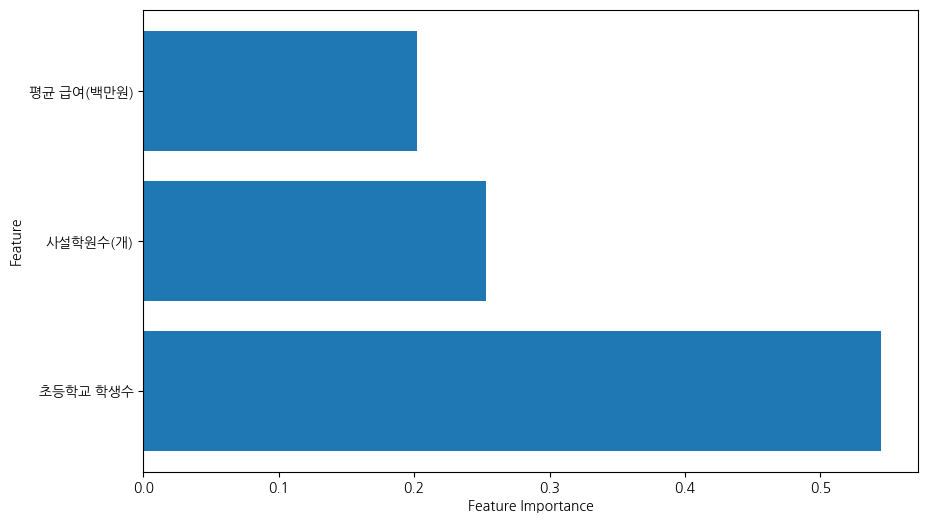

In [150]:
import koreanize_matplotlib
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
feature_importances = DT.feature_importances_

# 특성 이름 리스트 (만약 특성의 이름이 있다면)
feature_names = ['초등학교 학생수','사설학원수(개)','평균 급여(백만원)']  

# 특성 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances, align='center')
plt.yticks(np.arange(len(feature_importances)), feature_names)

plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

### 데이터들을 스케일링한 후 위에서 확인한 중요도에 맞춰 가중치를 주어 값을 계산한다.

In [151]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['초등학교 학생수', '사설학원수(개)', '평균 급여(백만원)']
weights = [1.5, 0.8, 1.2]
scaler = MinMaxScaler()
for i, col in enumerate(columns_to_scale):
    new_col_name = col + '_scaled'
    df_2022[new_col_name] = scaler.fit_transform(df_2022[[col]]) * weights[i]
    
df_2022['가중합'] = df_2022[[col + '_scaled' for col in columns_to_scale]].sum(axis=1)

In [152]:
# 가중합을 기준으로 하여 순위를 매긴다
df_2022['순위'] = df_2022['가중합'].rank(ascending=False, method='min')
# 지역별 가중합을 기준으로 순위
df_2022['지역별 순위'] = df_2022.groupby('지역')['가중합'].rank(ascending=False)
# 지역별 학생수를 기준으로 순위
df_2022['지역별 학생수 순위'] = df_2022.groupby('지역')['초등학교 학생수'].rank(ascending=False)

In [153]:
df_2022

,지역,행정구역별,초등학교 학생수,사설학원수(개),평균 급여(백만원),Target,초등학교 학생수_scaled,사설학원수(개)_scaled,평균 급여(백만원)_scaled,가중합,순위,지역별 순위,지역별 학생수 순위
0,서울특별시,종로구,53537.0,248.0,55.396114,1,0.427751,0.07936,0.775561,1.282672,51.0,14.0,12.0
1,서울특별시,중구,34946.0,108.0,51.574272,1,0.279212,0.03456,0.722054,1.035826,77.0,21.0,20.0
2,서울특별시,용산구,27552.0,151.0,75.401150,1,0.220135,0.04832,1.055637,1.324092,45.0,11.0,23.0
3,서울특별시,성동구,50768.0,294.0,58.089157,1,0.405627,0.09408,0.813264,1.312971,46.0,12.0,14.0
4,서울특별시,광진구,69065.0,441.0,43.268932,1,0.551817,0.14112,0.605777,1.298714,49.0,13.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,경상남도,함양군,3124.0,40.0,34.537537,0,0.024960,0.01280,0.483535,0.521295,195.0,12.0,14.0
225,경상남도,거창군,9189.0,86.0,34.763977,0,0.073418,0.02752,0.486705,0.587644,150.0,9.0,9.0
226,경상남도,합천군,2504.0,30.0,33.631878,0,0.020006,0.00960,0.470856,0.500462,216.0,17.0,16.0
227,제주특별자치도,제주시,91703.0,930.0,35.934963,0,0.732690,0.29760,0.503099,1.533389,27.0,1.0,1.0


In [154]:
dff=df_2022[df_2022['순위']<100].groupby('지역').size()
dff= pd.DataFrame(dff)
dff = dff.reset_index(drop=False)

In [155]:
import plotly.express as px
# This dataframe has 244 lines, but 4 distinct values for `day`
fig = px.pie(dff, values=0, names='지역')

fig.update_traces(textinfo='percent+label')
fig.show()

### 순위가 높은 일부 지역에 대해 시각화

In [156]:
import plotly.express as px
# 상위 n개 지역 중 특정 지역에 속하는 행정구역을 리스트로 만든다
top_2_ranked = df_2022[df_2022['지역별 순위'] < 4]
select_region=top_2_ranked[top_2_ranked['지역'].isin(['서울특별시','경기도','부산광역시','광주광역시'])]

# 각 지역별 상위 3개의 자치구에 대해 시각화를 진행한다.
df_data = select_region
fig = px.scatter_3d(df_data, x='초등학교 학생수_scaled', y='사설학원수(개)_scaled', z='평균 급여(백만원)_scaled',
              color='지역', symbol='행정구역별')
fig.show()

### 광주지역에 대해서만 실행 

In [157]:

select_region= df_2022[df_2022['지역'] == '광주광역시']

# 각 지역별 상위 3개의 자치구에 대해 시각화를 진행한다.
df_data = select_region
fig = px.scatter_3d(df_data, x='초등학교 학생수_scaled', y='사설학원수(개)_scaled', z='평균 급여(백만원)_scaled',
              color='지역', symbol='행정구역별')
fig.show()

In [158]:
df_2022_re=df_2022[['지역','행정구역별','초등학교 학생수','사설학원수(개)','평균 급여(백만원)','가중합','지역별 순위']]

In [159]:
df_2022_re[df_2022_re['지역']=='광주광역시'].sort_values(by='지역별 순위', ascending=True)

,지역,행정구역별,초등학교 학생수,사설학원수(개),평균 급여(백만원),가중합,지역별 순위
64,광주광역시,광산구,83424.0,940.0,39.617447,1.521998,1.0
63,광주광역시,북구,87880.0,930.0,36.990300,1.517619,2.0
62,광주광역시,남구,47231.0,632.0,42.153584,1.169769,3.0
61,광주광역시,서구,31728.0,718.0,41.715610,1.067291,4.0
60,광주광역시,동구,41068.0,304.0,42.536842,1.020933,5.0


# 시도별 데이터 재정렬

In [160]:
df_purunet = Dataset['purunet - purunet (1)']
df_heabeop = Dataset['heabeop_좌표변환_최종']

In [161]:
df_heabeop['지역'] = df_heabeop['주소'].apply(lambda x:x.split(' ')[0])
df_heabeop['행정구역별'] = df_heabeop['주소'].apply(lambda x:x.split(' ')[1])


In [162]:
df_heabeop['지역'] = df_heabeop['지역'].apply(change_region_name)

In [163]:
df_heabeop

,title,주소,Latitude,Longitude,지역,행정구역별
0,수원 광교SK레이크점,"경기 수원시 영통구 법조로 25 (하동, 광교 SK VIEW Lake)",37.287435,127.059651,경기도,수원시
1,스마트해법 북아현점,서울 서대문구 북아현동 180-27,37.562941,126.954971,서울특별시,서대문구
2,스마트해법수학 왕지점,"전남 순천시 연동남길 39 (조례동, 서영옥머리마당)",34.957692,127.533397,전라남도,순천시
3,DMC스마트해법학원,서울 서대문구 증가로 150 (남가좌동),37.569967,126.916626,서울특별시,서대문구
4,sk view,"서울 영등포구 여의대방로35가길 19 (신길동, 보라매 SK VIEW)",37.502845,126.917376,서울특별시,영등포구
...,...,...,...,...,...,...
2291,효자세븐팰리스점,"전북 전주시 완산구 호암로 75-11 (효자동2가, 7단지아파트상가)",35.810495,127.102529,전라북도,전주시
2292,효자포스코,전북 전주시 완산구 봉곡로 132,35.809813,127.107383,전라북도,전주시
2293,효천연세수학점,전북 전주시 완산구 효천서로 20,35.800966,127.104444,전라북도,전주시
2294,효천우미린2차점,전북 전주시 완산구 효천서로 20,35.800966,127.104444,전라북도,전주시


In [164]:
df_purunet['지역'] = df_purunet['주소'].apply(lambda x:x.split(' ')[0])
df_purunet['행정구역별'] = df_purunet['주소'].apply(lambda x:x.split(' ')[1])
df_purunet['지역'] = df_purunet['지역'].apply(change_region_name)

In [165]:
df_purunet

,title,주소,Latitude,Longitude,지번,지역,행정구역별
0,푸르넷공부방,경기 광명시 오리로 374,37.435784,126.879691,(지번) 소하동 1242-13,경기도,광명시
1,푸르넷 소하공부방,경기 광명시 소하일로52번길 29 102호,37.448681,126.890347,(지번) 소하동 1311-13,경기도,광명시
2,푸르넷공부방,경기 안양시 만안구 충훈로71번길 36,37.405994,126.899218,(지번) 석수동 782-9,경기도,안양시
3,푸르넷공부방,경기 안양시 만안구 충훈로 51 석수아이파크 109동,37.406288,126.901471,(지번) 석수동 794,경기도,안양시
4,푸르넷 수정공부방,경기 광명시 하안로 364 904동 804호,37.467655,126.877415,(지번) 하안동 13,경기도,광명시
...,...,...,...,...,...,...,...
313,서귀서초푸르넷공부방,제주특별자치도 서귀포시 솜반천로 31,33.253764,126.557411,(지번) 서홍동 444-1,제주특별자치도,서귀포시
314,푸르넷공부방 한림점,제주특별자치도 제주시 한림읍 한림로6길 23,33.411785,126.263136,(지번) 한림읍 한림리 1454-15,제주특별자치도,제주시
315,한천빌라푸르넷공부방,제주특별자치도 제주시 용남1길 42-24 102호,33.506198,126.512387,(지번) 용담일동 262-9,제주특별자치도,제주시
316,푸르넷위미초공부방,제주특별자치도 서귀포시 남원읍 태위로 68 2층,33.273599,126.654900,(지번) 남원읍 위미리 3126-1,제주특별자치도,서귀포시


In [166]:
df_ranked1 = df_2022.copy()

In [167]:
# 새로운 컬럼 초기값 0으로
df_ranked1['해법수학 수'] = 0
df_ranked1['푸르넷 공부방 수'] = 0

In [168]:
# 행정구역별 개수
for index, row in df_ranked1.iterrows():
    matching_rows = df_heabeop[(df_heabeop['행정구역별'] == row['행정구역별']) & (df_heabeop['지역'] == row['지역'])]
    count = len(matching_rows)
    df_ranked1.at[index, '해법수학 수'] = count
    
for index, row in df_ranked1.iterrows():
    matching_rows = df_purunet[(df_purunet['행정구역별'] == row['행정구역별']) & (df_purunet['지역'] == row['지역'])]
    count = len(matching_rows)
    df_ranked1.at[index, '푸르넷 공부방 수'] = count

In [169]:
df_ranked1

,지역,행정구역별,초등학교 학생수,사설학원수(개),평균 급여(백만원),Target,초등학교 학생수_scaled,사설학원수(개)_scaled,평균 급여(백만원)_scaled,가중합,순위,지역별 순위,지역별 학생수 순위,해법수학 수,푸르넷 공부방 수
0,서울특별시,종로구,53537.0,248.0,55.396114,1,0.427751,0.07936,0.775561,1.282672,51.0,14.0,12.0,2,0
1,서울특별시,중구,34946.0,108.0,51.574272,1,0.279212,0.03456,0.722054,1.035826,77.0,21.0,20.0,3,0
2,서울특별시,용산구,27552.0,151.0,75.401150,1,0.220135,0.04832,1.055637,1.324092,45.0,11.0,23.0,4,0
3,서울특별시,성동구,50768.0,294.0,58.089157,1,0.405627,0.09408,0.813264,1.312971,46.0,12.0,14.0,14,0
4,서울특별시,광진구,69065.0,441.0,43.268932,1,0.551817,0.14112,0.605777,1.298714,49.0,13.0,7.0,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,경상남도,함양군,3124.0,40.0,34.537537,0,0.024960,0.01280,0.483535,0.521295,195.0,12.0,14.0,0,0
225,경상남도,거창군,9189.0,86.0,34.763977,0,0.073418,0.02752,0.486705,0.587644,150.0,9.0,9.0,1,0
226,경상남도,합천군,2504.0,30.0,33.631878,0,0.020006,0.00960,0.470856,0.500462,216.0,17.0,16.0,0,0
227,제주특별자치도,제주시,91703.0,930.0,35.934963,0,0.732690,0.29760,0.503099,1.533389,27.0,1.0,1.0,10,19


In [170]:
df_ranked1=df_ranked1[['지역','행정구역별','초등학교 학생수','지역별 순위','지역별 학생수 순위','해법수학 수', '푸르넷 공부방 수']]
df_ranked1

,지역,행정구역별,초등학교 학생수,지역별 순위,지역별 학생수 순위,해법수학 수,푸르넷 공부방 수
0,서울특별시,종로구,53537.0,14.0,12.0,2,0
1,서울특별시,중구,34946.0,21.0,20.0,3,0
2,서울특별시,용산구,27552.0,11.0,23.0,4,0
3,서울특별시,성동구,50768.0,12.0,14.0,14,0
4,서울특별시,광진구,69065.0,13.0,7.0,11,0
...,...,...,...,...,...,...,...
224,경상남도,함양군,3124.0,12.0,14.0,0,0
225,경상남도,거창군,9189.0,9.0,9.0,1,0
226,경상남도,합천군,2504.0,17.0,16.0,0,0
227,제주특별자치도,제주시,91703.0,1.0,1.0,10,19


In [171]:
grouped_heabeop = df_ranked1.groupby('지역')['해법수학 수'].sum()
grouped_stu = df_ranked1.groupby('지역')['초등학교 학생수'].sum()
grouped_purunet = df_ranked1.groupby('지역')['푸르넷 공부방 수'].sum()
grouped_purunet_stu = df_ranked1.groupby('지역')['초등학교 학생수'].sum()
# 지역과 행정구역별 해법수학 수 비율 계산 후 새로운 열로 추가
df_ranked1['행정구역별 학생수 비율'] = df_ranked1.apply(lambda x: round(x['초등학교 학생수']*100 / grouped_stu[x['지역']],3), axis=1)
df_ranked1['행정구역별 해법수학 비율'] = df_ranked1.apply(lambda x: round(x['해법수학 수']*100 / grouped_heabeop[x['지역']],3), axis=1)

df_ranked1['행정구역별 푸르넷 공부방 비율'] = df_ranked1.apply(lambda x: round(x['푸르넷 공부방 수']*100 / grouped_purunet[x['지역']],3), axis=1)

C:\Users\user\AppData\Local\Temp\ipykernel_20788\3328421333.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_20788\3328421333.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_20788\3328421333.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [172]:
df_ranked1

,지역,행정구역별,초등학교 학생수,지역별 순위,지역별 학생수 순위,해법수학 수,푸르넷 공부방 수,행정구역별 학생수 비율,행정구역별 해법수학 비율,행정구역별 푸르넷 공부방 비율
0,서울특별시,종로구,53537.0,14.0,12.0,2,0,3.757,0.518,0.000
1,서울특별시,중구,34946.0,21.0,20.0,3,0,2.452,0.777,0.000
2,서울특별시,용산구,27552.0,11.0,23.0,4,0,1.933,1.036,0.000
3,서울특별시,성동구,50768.0,12.0,14.0,14,0,3.563,3.627,0.000
4,서울특별시,광진구,69065.0,13.0,7.0,11,0,4.847,2.850,0.000
...,...,...,...,...,...,...,...,...,...,...
224,경상남도,함양군,3124.0,12.0,14.0,0,0,0.619,0.000,0.000
225,경상남도,거창군,9189.0,9.0,9.0,1,0,1.822,0.629,0.000
226,경상남도,합천군,2504.0,17.0,16.0,0,0,0.497,0.000,0.000
227,제주특별자치도,제주시,91703.0,1.0,1.0,10,19,82.056,66.667,57.576


In [173]:
# 지역별 점유율 비교를 위한 정의 함수
def rank_share(region_val):
    df_region = df_ranked1[df_ranked1['지역']== region_val]
    
    df_region['당사 비율에 따른 순위'] = df_region['행정구역별 해법수학 비율'].rank(ascending=False, method='min')
    df_region['경쟁사 비율에 따른 순위'] = df_region['행정구역별 푸르넷 공부방 비율'].rank(ascending=False, method='min')

    df_region=df_region[['지역', '행정구역별', '초등학교 학생수','행정구역별 학생수 비율', 
                         '행정구역별 해법수학 비율', '행정구역별 푸르넷 공부방 비율','지역별 순위',
                         '당사 비율에 따른 순위', '경쟁사 비율에 따른 순위']].sort_values(by='지역별 순위', ascending=True)
    
    
    return df_region.rename_axis(index=None)

In [174]:
df_rank_광주 = rank_share('부산광역시')
df_rank_광주.head(3)

C:\Users\user\AppData\Local\Temp\ipykernel_20788\3742868374.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_20788\3742868374.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,지역,행정구역별,초등학교 학생수,행정구역별 학생수 비율,행정구역별 해법수학 비율,행정구역별 푸르넷 공부방 비율,지역별 순위,당사 비율에 따른 순위,경쟁사 비율에 따른 순위
31,부산광역시,남구,76591.0,14.037,5.161,0.0,1.0,9.0,6.0
33,부산광역시,해운대구,47384.0,8.684,7.097,30.0,2.0,5.0,1.0
35,부산광역시,금정구,66238.0,12.140,3.871,20.0,3.0,12.0,2.0


In [175]:
on_mapping = {
        '서울': '서울특별시',
        '부산': '부산광역시',
        '대구': '대구광역시',
        '인천': '인천광역시',
        '광주': '광주광역시',
        '대전': '대전광역시',
        '울산': '울산광역시',
        '세종': '세종특별자치시',
        '경기': '경기도',
        '강원': '강원특별자치도',
        '충북': '충청북도',
        '충남': '충청남도',
        '전북': '전라북도',
        '전남': '전라남도',
        '경북': '경상북도',
        '경남': '경상남도',
        '제주': '제주특별자치도'
        }

In [176]:
df_rank_서울 = rank_share('울산광역시')
df_rank_서울

C:\Users\user\AppData\Local\Temp\ipykernel_20788\3742868374.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\user\AppData\Local\Temp\ipykernel_20788\3742868374.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,지역,행정구역별,초등학교 학생수,행정구역별 학생수 비율,행정구역별 해법수학 비율,행정구역별 푸르넷 공부방 비율,지역별 순위,당사 비율에 따른 순위,경쟁사 비율에 따른 순위
71,울산광역시,남구,54029.0,31.072,31.25,35.714,1.0,2.0,1.0
73,울산광역시,북구,34119.0,19.622,37.50,7.143,2.0,1.0,4.0
74,울산광역시,울주군,32584.0,18.739,12.50,7.143,3.0,4.0,4.0
70,울산광역시,중구,23734.0,13.650,18.75,21.429,4.0,3.0,3.0
72,울산광역시,동구,29415.0,16.917,0.00,28.571,5.0,5.0,2.0


In [177]:
import plotly.express as px



# 해법수학에 대해 scatter_mapbox 그래프로 생성
fig = px.scatter_mapbox(df_heabeop, lat="Latitude", lon="Longitude", hover_name="title",
                        color_discrete_sequence=["fuchsia"], zoom=3, height=100)

# 경쟁사(푸르넷) scatter_mapbox 그래프로 생성하여 추가
fig.add_trace(px.scatter_mapbox(df_purunet, lat="Latitude", lon="Longitude", hover_name="title",
                                color_discrete_sequence=["blue"]).data[0])

# 지도 스타일과 레이아웃 설정
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(height=1000, width=1000)
# 그래프 표시
fig.show()